In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
crash = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [3]:
crash.head(2)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...


In [ ]:
#Objectives:
#Extract data for plane crashes in WWII 
#Distribution of times during the day when these crashes happened
#Highlight deadliest year in air crash history

In [4]:
#Create a column for year

def yrsplit(mystr):
    return mystr.split('/')[2]

crash['Year'] = crash['Date'].apply(yrsplit)
crash['Year'] = crash['Year'].astype(dtype='int32')
crash['Total deaths'] = crash['Aboard'] + crash['Ground']

In [5]:
#Extracting plane crash data for years during which WWII happened
ww2_crash = crash[(crash['Year']==1939)|(crash['Year']==1940)|(crash['Year']==1941)|(crash['Year']==1942)|(crash['Year']==1943)|(crash['Year']==1944)|(crash['Year']==1945)]

In [6]:
ww2_crash.info() #Total 252 initial entries for WWII

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 503 to 754
Data columns (total 15 columns):
Date            252 non-null object
Time            108 non-null object
Location        247 non-null object
Operator        249 non-null object
Flight #        40 non-null object
Route           107 non-null object
Type            247 non-null object
Registration    231 non-null object
cn/In           148 non-null object
Aboard          244 non-null float64
Fatalities      246 non-null float64
Ground          244 non-null float64
Summary         205 non-null object
Year            252 non-null int32
Total deaths    242 non-null float64
dtypes: float64(4), int32(1), object(10)
memory usage: 30.5+ KB


# Crash fatalties in WWII by country (major players)

In [10]:
#Omitting crashes whose location is unknown
ww2_crash_update0 = ww2_crash.dropna(subset = ['Location'])
#247 entries remaining after removing crashes whose location is unknown

In [11]:
#Simplifying dataset by putting all plane crashes which occured in different states of USA under 'USA' location

def region(mystr):
    states = [' New Jersey',' Montana',' Washington',' Oklahoma',' California',' Virginia',' Utah', 
              ' Illinois', ' Minnesota', ' Florida', ' Nevada',' North Carolina',' Kentucky', ' Texas', ' Tennessee',
                ' Alaska','Alaska','Texas','Off the Florida coast',' Nebraska','Washington D.C.', ' South Carolina', ' New York']
    last = mystr.split(',')[-1]
    if last in states:
        return 'USA'
    else:
        return last

ww2_crash_update0['Region'] = ww2_crash_update0['Location'].apply(region)

In [ ]:
#Majority of the fatalities recorded occurred on board: it is plausible to get information about which country each plane
#belonged to in order to get the death count for that country. 

In [12]:
#Extracting first name of manufacturer: 242 entries remaining after removing crashes where plane manufacturer info is unknown
ww2_crash_update1 = ww2_crash_update0.dropna(subset = ['Type'])
def manu(mystr):
    return mystr.split()[0]
ww2_crash_update1['Manufacturer'] = ww2_crash_update1['Type'].apply(manu)

#Defining a dictionary and applying a map function to map the 'type' of aircraft to the country it belongs to
cmap = {'Douglas':'USA', 'Junkers': 'Germany', 'Lockheed':'USA', 'Consolidated':'USA', 'Dewoitine': 'France', 'Sikorsky': 'USA','Short':'England', 'Curtiss-Wright': 'USA', 'Boeing':'USA', 'Focke-Wulf': 'Germany', 'Martin':'USA'}

ww2_crash_update1['Manufacturer'] = ww2_crash_update1['Manufacturer'].map(cmap)
ww2_crash_update1['Manufacturer'].value_counts() #Categorizing 210/252 plane crashes in WWII

USA        170
Germany     24
England     12
France       4
Name: Manufacturer, dtype: int64

# Loss of lives suffered by major players: home country vs outside of home country losses

In [13]:
ww2_crash_USA = ww2_crash_update1[ww2_crash_update1['Manufacturer'] == 'USA']

ww2_crash_USA_hm = ww2_crash_USA[ww2_crash_USA['Region'] == ww2_crash_USA['Manufacturer']]
#USA suffered 700 loss of lives due to 38 plane crashes in home country in WWII

ww2_crash_USA_nonhm = ww2_crash_USA[ww2_crash_USA['Region'] != ww2_crash_USA['Manufacturer']]
#USA suffered 2237 loss of lives due to 132 plane crashes out of home country in WWII

ww2_crash_England = ww2_crash_update1[ww2_crash_update1['Manufacturer'] == 'England']
#England suffered 0 loss of lives due to plane crashes in home country in WWII

ww2_crash_England_nonhm = ww2_crash_England[ww2_crash_England['Region'] != ww2_crash_England['Manufacturer']]
#England suffered 221 loss of lives due to plane crashes out of home country in WWII

ww2_crash_France = ww2_crash_update1[ww2_crash_update1['Manufacturer'] == ' France']
new_manufacturer = ' France'
ww2_crash_France_nonhm = ww2_crash_France[ww2_crash_France['Region'] != 'France']
#France suffered 1 loss of life due to plane crashes in own territory
#France suffered 34 loss of lives due to plane crashes out of own territory

ww2_crash_Germany = ww2_crash_update1[ww2_crash_update1['Manufacturer'] == 'Germany']
new_manufacturer = ' Germany'
ww2_crash_Germany_hm = ww2_crash_Germany[ww2_crash_Germany['Region'] == new_manufacturer]
#Germany suffered 57 loss of lives due to plane crashes in own territory
ww2_crash_Germany_nonhm = ww2_crash_Germany[ww2_crash_Germany['Region'] != new_manufacturer]
#Germany suffered 206 loss of lives due to plane crashes out of own territory

In [14]:
#Combining number of plane crashes + death count for major players in a dataframe
df = pd.DataFrame({'plane crashes': [170,24,12,4], 'death count': [3064,263,221,35]}, index=['USA','Germany','England','France'])
df

,plane crashes,death count
USA,170,3064
Germany,24,263
England,12,221
France,4,35


# Time distribution of crashes during WWII (based on 40% of entries)

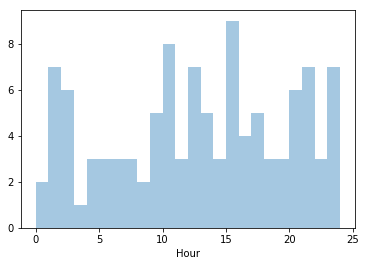

In [16]:
ww2_crash_time = ww2_crash.dropna(subset = ['Time'])
def thehour(mystr):
    nums = mystr.split(':')
    if int(nums[1]) > 30:
        return int(nums[0]) + 1
    else:
        return int(nums[0])

ww2_crash_time['Hour'] = ww2_crash_time['Time'].apply(thehour)

sns.distplot(ww2_crash_time['Hour'],kde=False,bins=24)

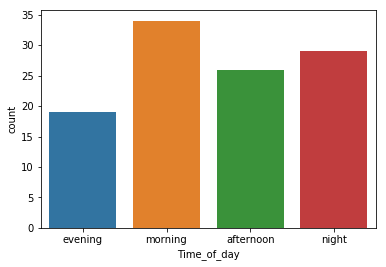

In [17]:
ww2_crash_time = ww2_crash.dropna(subset = ['Time'])
def myhour(mystr):
    nums = mystr.split(':')
    if int(nums[1]) > 30:
        mynum = int(nums[0]) + 1
    else:
        mynum = int(nums[0])
        
    if mynum in [22,23,24,0,1,2,3,4]:
        return 'night'
    elif mynum in [5,6,7,8,9,10,11,12]:
        return 'morning'
    elif mynum in [13,14,15,16,17]:
        return 'afternoon'
    else:
        return 'evening'
    
ww2_crash_time['Time_of_day'] = ww2_crash_time['Time'].apply(myhour)

sns.countplot(x = 'Time_of_day', data = ww2_crash_time)

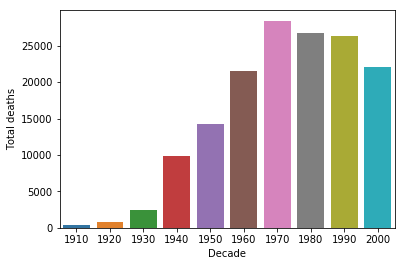

In [18]:
#Finding deadliest year in crash history (amounting to biggest number of deaths)
crash_copy = crash.iloc[1:]
byYear_deaths = crash_copy.groupby('Year').sum()
byYear_deaths.reset_index(inplace = True)
byYear_deaths = byYear_deaths.iloc[1:]
byYear_deaths
def decade(myyear):
    if myyear >= 1910 and myyear < 1920:
        return 1910
    elif myyear >= 1920 and myyear < 1930:
        return 1920
    elif myyear >= 1930 and myyear < 1940:
        return 1930
    elif myyear >= 1940 and myyear < 1950:
        return 1940
    elif myyear >= 1950 and myyear < 1960:
        return 1950
    elif myyear >= 1960 and myyear < 1970:
        return 1960
    elif myyear >= 1970 and myyear < 1980:
        return 1970
    elif myyear >= 1980 and myyear < 1990:
        return 1980
    elif myyear >= 1990 and myyear < 2000:
        return 1990
    else:
        return 2000
    
byYear_deaths['Decade'] = byYear_deaths['Year'].apply(decade)
byDecade_deaths = byYear_deaths.groupby('Decade').sum()
byDecade_deaths = byDecade_deaths.reset_index()
#byDecade_deaths['Total deaths'].sum() #Total deaths in plane crashes in last 100 years is roughly 150,000

sns.barplot(x = 'Decade', y = 'Total deaths', data = byDecade_deaths)

In [ ]:
#Years 1970-1979 have been the deadliest in plane crash history. However, despite technological advancements
#the death toll hasn't dropped significantly since then resulting in 20000 lives lost in plane crashes during 2000s.